<a href="https://colab.research.google.com/github/aukabir/Machine_Learning_project_1/blob/main/MLproject_1_iris_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import sklearn

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# Load and understanding data

## Loading the dataset

In [2]:
#load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, header=None, names=[
                        'sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'])

## Understanding the dataset

2.2.1 Preview data

In [3]:
#preview data
iris.sample(3)

,sepallength,sepalwidth,petallength,petalwidth,class
143,6.8,3.2,5.9,2.3,Iris-virginica
65,6.7,3.1,4.4,1.4,Iris-versicolor
67,5.8,2.7,4.1,1.0,Iris-versicolor


In [4]:
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2.2.2 Description of dataset

In [5]:
#Description of Data
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepallength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepalwidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petallength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petalwidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
#Flower distribution
iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

2.2.4 Shape of Data

In [8]:
#Data Shape
iris.shape

(150, 5)

# Data visualization

The visualization techniques provide imagery representation of Iris species and feature It is used to determine correlations between the X and Y variables (dependent and independent variables).
Now, we are going to visualize the dataset in two ways such as Boxplot, and pairwise joint plot distribution (scatter plot).

## Boxplot

<Axes: xlabel='class', ylabel='petalwidth'>

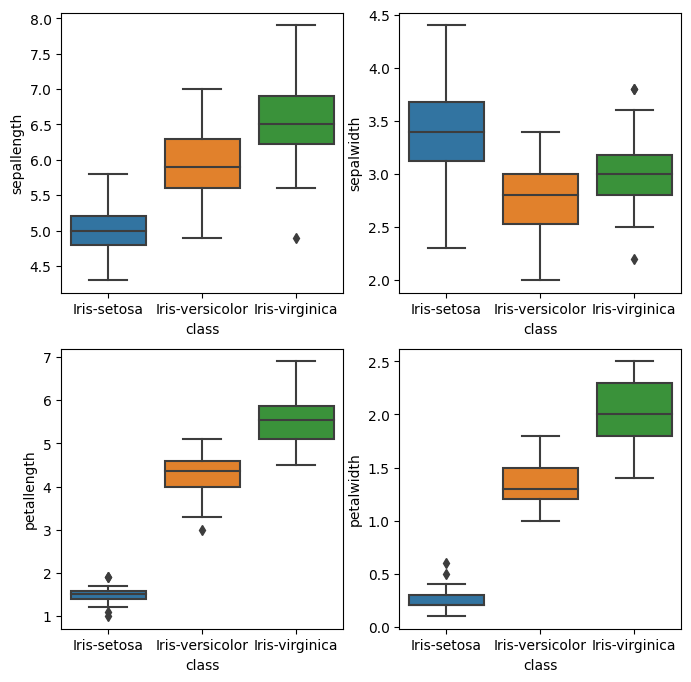

In [9]:
#Boxplot
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(x='class',y='sepallength',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='class',y='sepalwidth',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='class',y='petallength',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='class',y='petalwidth',data=iris)


## Violin Plot

<Axes: xlabel='class', ylabel='petalwidth'>

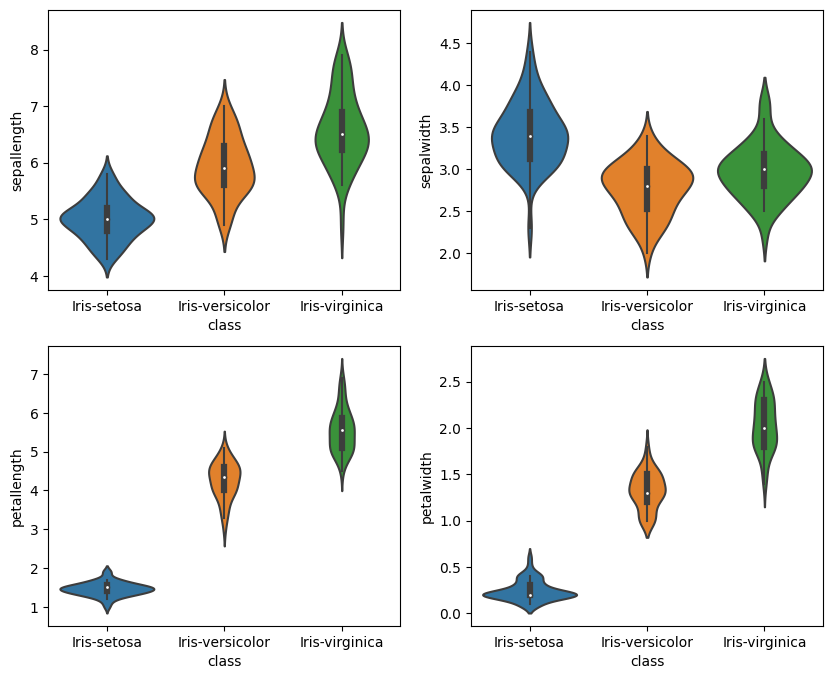

In [12]:
#Violin plot
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='sepallength',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='sepalwidth',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='petallength',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='petalwidth',data=iris)

## Density Plot

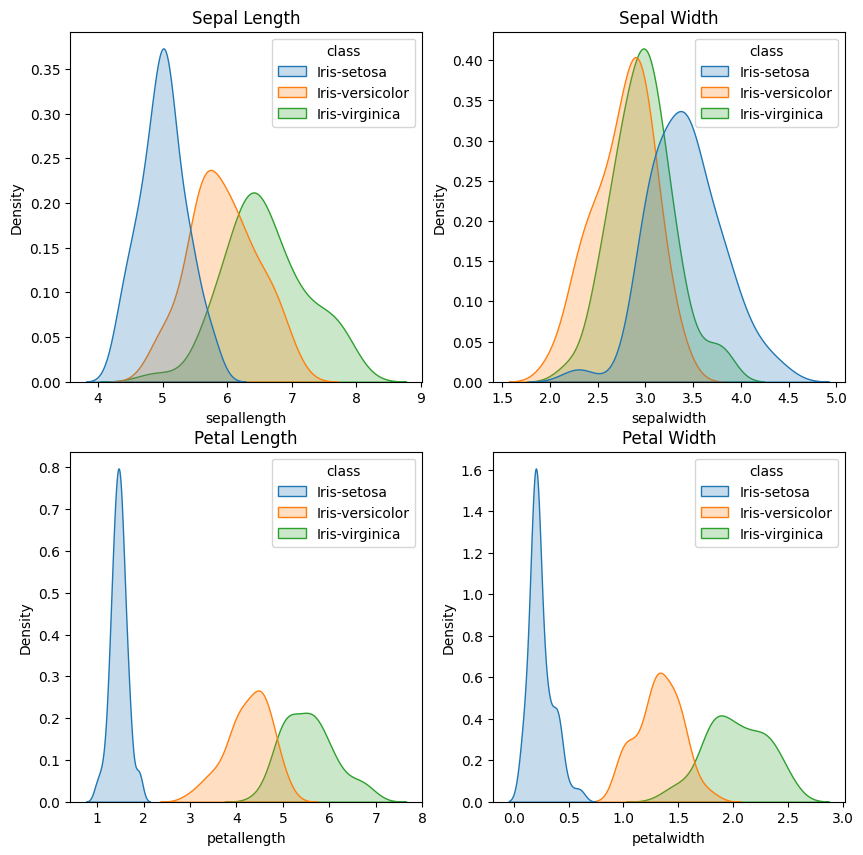

In [10]:
# kernel density estimation (KDE) plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the density plot and histogram for each feature
sns.kdeplot(ax=axs[0, 0], data=iris, x="sepallength", fill=True, hue='class')
sns.kdeplot(ax=axs[0, 1], data=iris, x="sepalwidth", fill=True, hue='class')
sns.kdeplot(ax=axs[1, 0], data=iris, x="petallength", fill=True, hue='class')
sns.kdeplot(ax=axs[1, 1], data=iris, x="petalwidth", fill=True, hue='class')

# Add titles to the subplots
axs[0, 0].set_title("Sepal Length")
axs[0, 1].set_title("Sepal Width")
axs[1, 0].set_title("Petal Length")
axs[1, 1].set_title("Petal Width")

# Display the plots
plt.show()

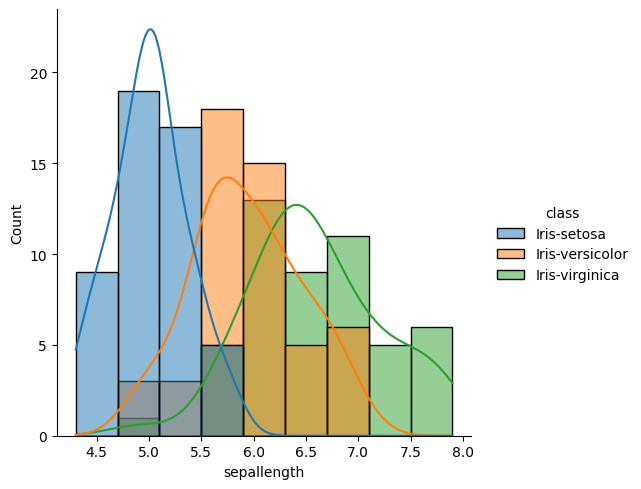

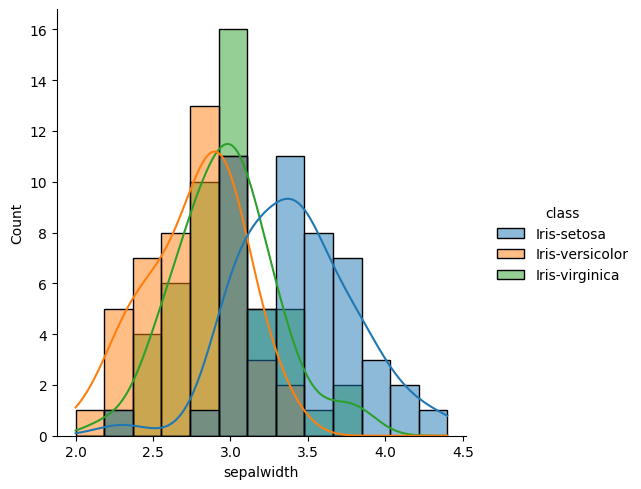

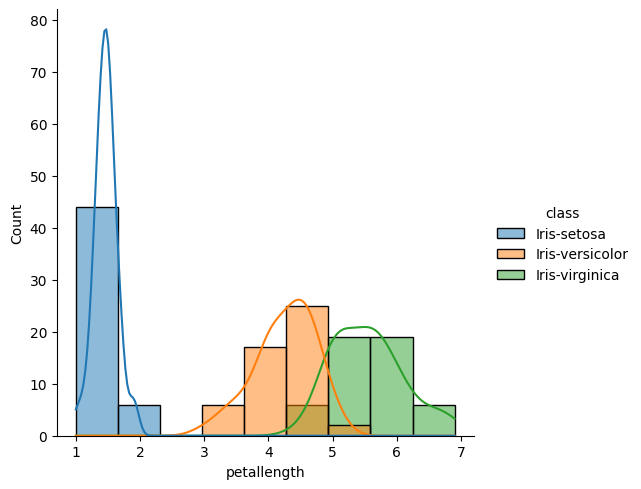

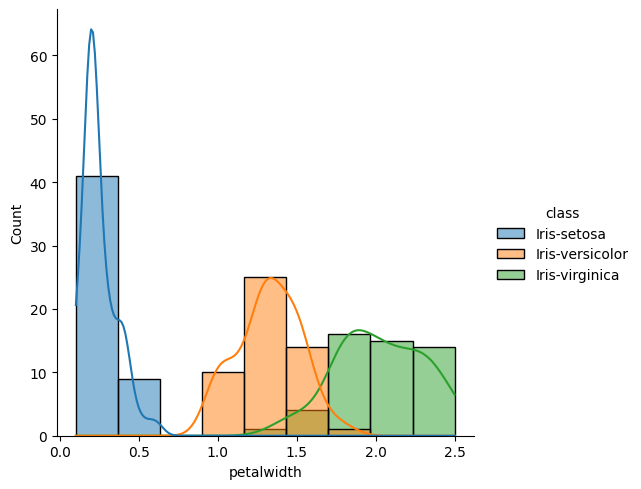

In [11]:
# Density Plot
sns.displot(data = iris, x='sepallength',hue='class',aspect=1,kde=True)
sns.displot(data = iris, x='sepalwidth',hue='class',aspect=1,kde=True)
sns.displot(data = iris, x='petallength',hue='class',aspect=1,kde=True)
sns.displot(data = iris, x='petalwidth',hue='class',aspect=1,kde=True)

# Display the plots
plt.show()

## Pair plot

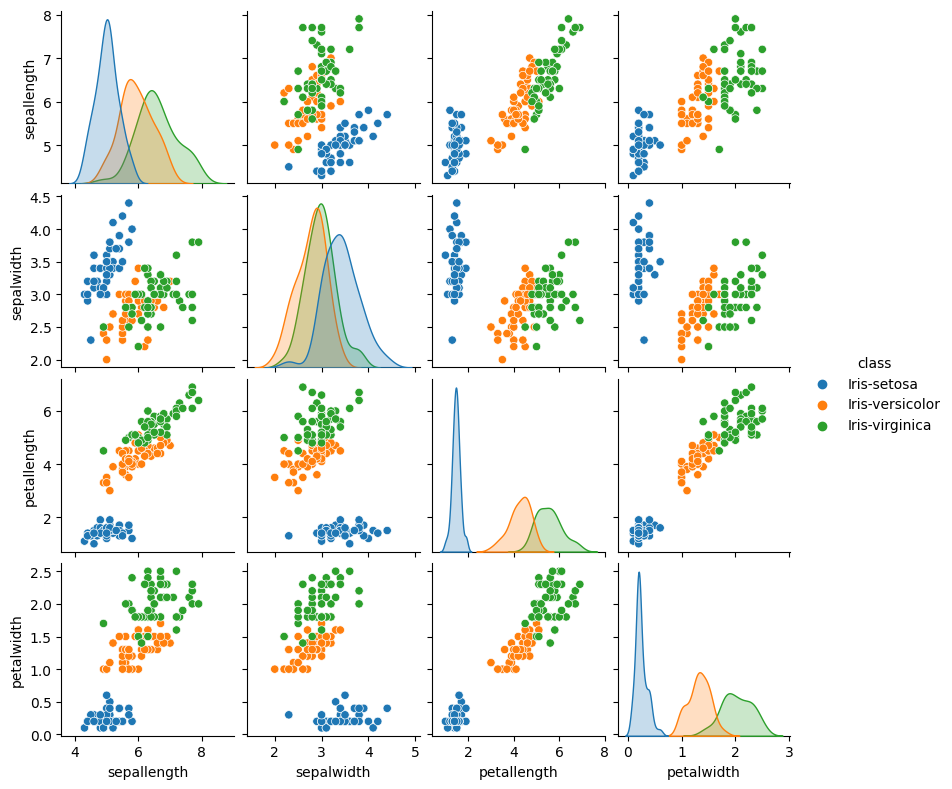

In [13]:
#Pairwise joint plot (scatter matrix)
#plt.figure(figsize=(10,8))
sns.pairplot(iris, hue='class', size=2, diag_kind="kde")

## Heatmap

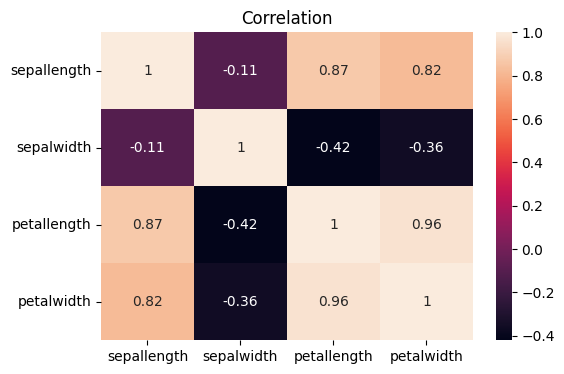

In [15]:
#To check correlation
plt.figure(figsize=(6,4))
sns.heatmap(iris.select_dtypes('float64').corr(),annot=True)
plt.title('Correlation')
plt.show()

# Preprocessing for ML Models

In [16]:
#Splitting dataset
X = iris.iloc[:,:-1].values
y = iris.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle=True)

In [17]:
#Feature Scaling for Classification
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#Feature Scaling for Clustering¶
sc = StandardScaler()
X = sc.fit_transform(X)

# Classification Models

## Logistic Regression

In [19]:
###Classification Models
##Logistic Regression
#Training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

Accuracy =  96.67  %


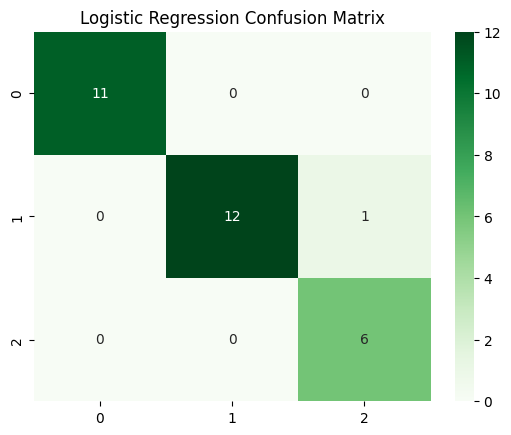

In [20]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = lr.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',lr_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.title('Logistic Regression Confusion Matrix');

## K-Nearest-Neighbour

In [21]:
###K-Nearest-Neighbour
##Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy =  100.0  %


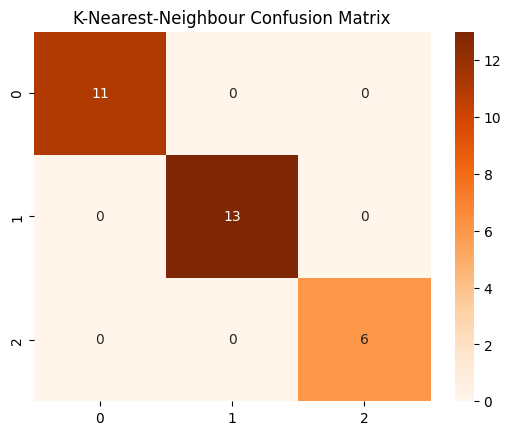

In [22]:
#Evaluating the model
y_pred = knn.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',knn_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Oranges')
plt.title('K-Nearest-Neighbour Confusion Matrix');

## Naive Bayes

In [23]:
##Naive Bayes
#Training the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

Accuracy =  96.67  %


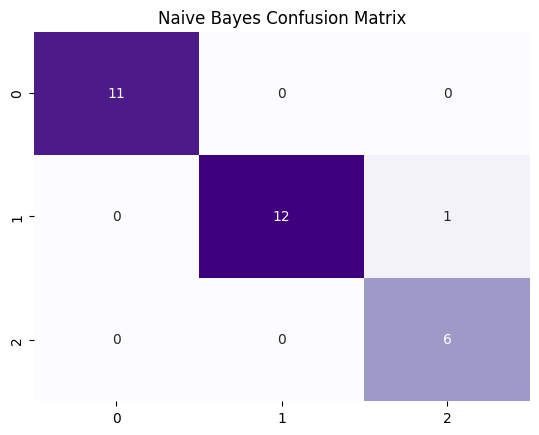

In [24]:
#Evaluating the model
y_pred = nb.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Purples', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');

## Decision Tree

In [25]:
##Decision Tree
#Training the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

Accuracy =  96.67  %


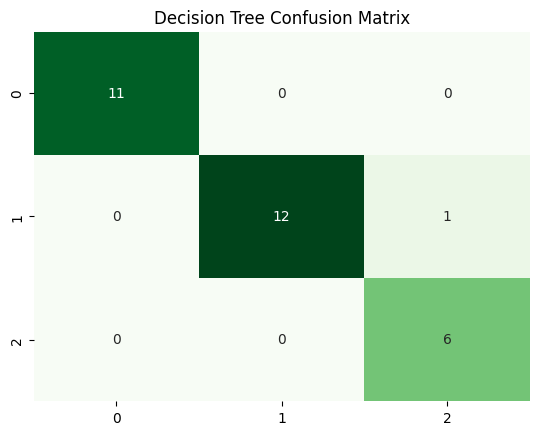

In [26]:
#Evaluating the model
y_pred = tree.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
tree_train_acc = round(accuracy_score(y_train,tree.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , tree_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Greens', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

##Random Forest

In [27]:
##Random Forest
#Training the model
from sklearn.ensemble import RandomForestClassifier
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

Accuracy =  96.67  %


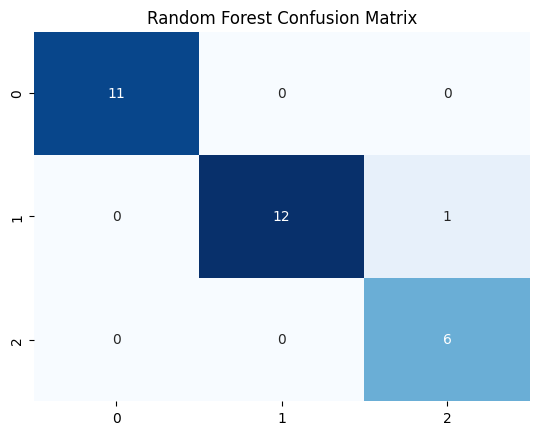

In [28]:
#Evaluating the model
y_pred = rdm_frst.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forest Confusion Matrix');

#Comparing Classification Models

In [29]:
###Comparing Classification Models
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Gaussian Naive Bayes','Decision Tree',
        'Random Forest'],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,nb_train_acc,tree_train_acc,rdm_train_acc],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc
    ]})
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
3,Decision Tree,100.0,96.67
4,Random Forest,100.0,96.67
0,Logistic Regression,97.5,96.67
1,K Nearest Neighbors,95.0,100.00
2,Gaussian Naive Bayes,95.0,96.67


In [30]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='Oranges_r')

,Model,Training Accuracy,Model Accuracy Score
1,K Nearest Neighbors,95.000000,100.000000
0,Logistic Regression,97.500000,96.670000
2,Gaussian Naive Bayes,95.000000,96.670000
3,Decision Tree,100.000000,96.670000
4,Random Forest,100.000000,96.670000
